<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


# Plot settings

In [250]:
# Set global settings for all plots


In [251]:
# Create a figure with a fixed size of 4 x 3 inches
plt.rcParams["font.size"] = 10  # Set the default font size to 14
plt.rcParams["lines.linewidth"] = 2.5  # Set the default line width to 2.5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 11
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['figure.figsize'] = 7,4
sns.set_style('ticks')

# Reading the data



In [252]:
# Importing the datasets
df  = pd.read_csv('emails.csv')
# y      = df.OSA.values
# x_data = df.drop(['OSA'], axis = 1)

# Display the data

In [253]:
df.shape

(5172, 3002)

**Drop unwanted data**

In [254]:
# Drop the first column
df = df.drop('Email No.', axis = 1)

In [255]:
# Drop rows with any NaN values
df = df.dropna()

In [256]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Class
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [257]:
df.sample(n = 10)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Class
2741,0,4,1,2,0,0,19,3,1,3,...,0,0,0,0,0,0,0,0,0,0
343,20,14,5,4,7,12,89,19,0,25,...,0,0,0,0,0,0,1,2,0,0
4659,5,1,1,0,4,0,22,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1481,4,0,1,0,5,0,20,0,0,6,...,0,0,0,0,0,0,0,0,0,0
3069,0,1,2,0,0,0,10,0,1,2,...,0,0,0,0,0,0,0,0,0,0
1780,25,14,34,6,13,4,182,7,18,26,...,0,0,0,0,0,0,0,0,0,0
1779,0,3,1,1,1,0,10,0,0,5,...,0,0,0,0,0,0,0,0,0,0
786,5,6,4,1,5,2,35,1,2,7,...,0,0,0,0,0,0,0,1,1,0
1622,5,3,1,0,1,0,19,3,0,1,...,0,0,0,0,0,0,0,0,0,0
4694,2,4,1,2,1,0,29,1,0,9,...,0,0,0,0,0,0,0,1,0,0


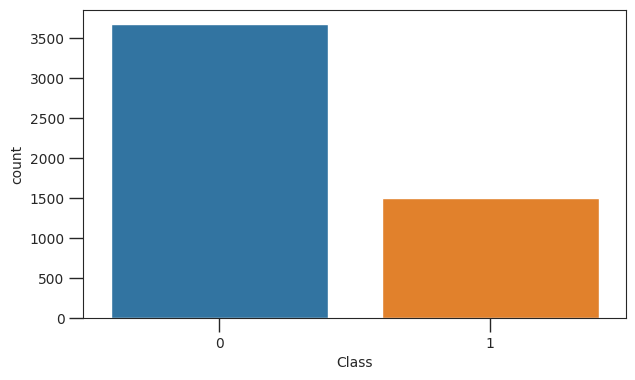

In [258]:
# Create a figure with size 8x6 inches, 80 dots per inch resolution
# fig = plt.figure(figsize=(8, 6), dpi=80)
# Calculate the number of classes in the class
sns.countplot(data=df, x='Class')
plt.savefig('classes.png')

In [259]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# The class can be used just like the RandomOverSampler class in the 
# previous section, except the strategies impact the majority class 
# instead of the minority class. For example, setting the sampling_strategy 
# argument to “majority” will undersample the majority class determined 
# by the class with the largest number of examples.

# define undersample strategy
# undersample = RandomOverSampler(sampling_strategy='not majority')
# x_over, y_over = undersample.fit_resample(x_data,y_data)

In [260]:
# y_over.value_counts().plot.pie(autopct='%.2f')

In [261]:
# x_over.shape

In [262]:
# sc = StandardScaler()
# X  = sc.fit_transform(x_over)
# Y  = y_over

In [263]:
# X

**Preparing data for machine learning**

In [264]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Class'], axis=1), 
                                                    df['Class'], 
                                                    test_size=0.3, 
                                                    random_state=42)

**Feaature selection**

In [265]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance. 

selector = SelectKBest(f_classif, k=20)
x_train   = selector.fit_transform(X_train, Y_train)
x_test    = selector.transform(X_test)

y_train = Y_train
y_test  = Y_test

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [1211 1899 2517] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [266]:
# Get the feature names
feature_names = list(df.columns)
# print(feature_names)

In [267]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

print(selected_feature_names)

Index(['hpl', 'our', 'forwarded', 'daren', 'attached', 'more', 'thanks',
       'money', 'best', 'subject', 'able', 'hanks', 'thank', 'ali', 'sex',
       'sec', 'dr', 'hp', 'ur', 'aren'],
      dtype='object')


In [268]:
X_train[selected_feature_names].head()

,hpl,our,forwarded,daren,attached,more,thanks,money,best,subject,able,hanks,thank,ali,sex,sec,dr,hp,ur,aren
1023,0,1,0,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,5,2
4587,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0
4415,7,0,0,2,0,0,2,0,0,1,0,2,2,0,0,1,0,7,0,2
4863,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
4901,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,2


In [269]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_confusion(name, y_train, y_pred_train, y_test, y_pred_test):
 
     # Calculate accuracy, precision, recall, and F1 score for training and testing sets
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_prec = precision_score(y_train, y_pred_train)
    test_prec = precision_score(y_test, y_pred_test)
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Calculate the confusion matrix for training and testing sets
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    # Create a 1x2 figure with the confusion matrix on the left and evaluation metrics on the right
    fig, axs = plt.subplots(1, 2, figsize=(8,3),sharey=True)
    
    # Plot the confusion matrix for training set
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', ax=axs[0],annot_kws={"size": 13})
    axs[0].set_title('Training Set Confusion Matrix',fontsize=8)
    axs[0].set_xlabel('Predicted Labels',fontsize=8)
    axs[0].set_ylabel('True Labels',fontsize=8)
    
    # Plot the confusion matrix for testing set
    sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', ax=axs[1],annot_kws={"size": 13})
    axs[1].set_title('Testing Set Confusion Matrix',fontsize=8)
    axs[1].set_xlabel('Predicted Labels',fontsize=8)
    axs[1].set_ylabel('True Labels',fontsize=8)
    
    # Add a main title to the figure
    fig.suptitle(f'Confusion matrix using {name} ', fontsize=11, y=1.05)
    plt.savefig(name + ".png")
    # plt.show()
    
    # Print the evaluation metrics for training and testing sets
    print(f'Accuracy: {train_acc:.3f}', end='\t')
    print(f'{test_acc:.3f}')

    print(f'Precision: {train_prec:.3f}', end='\t')
    print(f'{test_prec:.3f}')

    print(f'Recall: {train_rec:.3f}', end='\t')
    print(f'{test_rec:.3f}')

    print(f'F1 Score: {train_f1:.3f}', end='\t')
    print(f'{test_f1:.3f}')

    


Accuracy: 0.864	0.876
Precision: 0.817	0.836
Recall: 0.681	0.719
F1 Score: 0.743	0.773


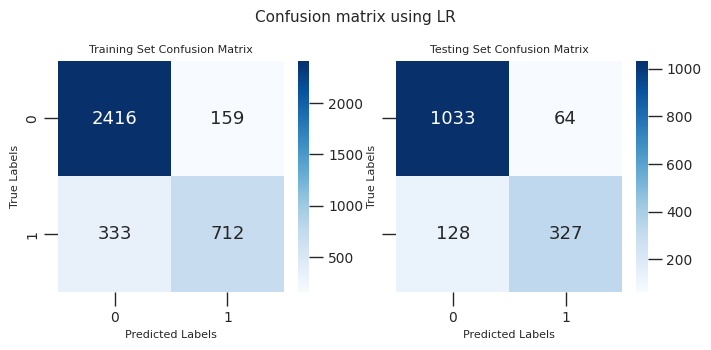

In [270]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# We now prepare our selected models
models  = []
results   = []
names   = []
scoring  = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=20)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_train, y_train)
results.append(cv_results)  

In [271]:
# Compute False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, lr.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_train,lr.predict(x_train))

Accuracy: 0.861	0.856
Precision: 0.839	0.815
Recall: 0.640	0.657
F1 Score: 0.726	0.727


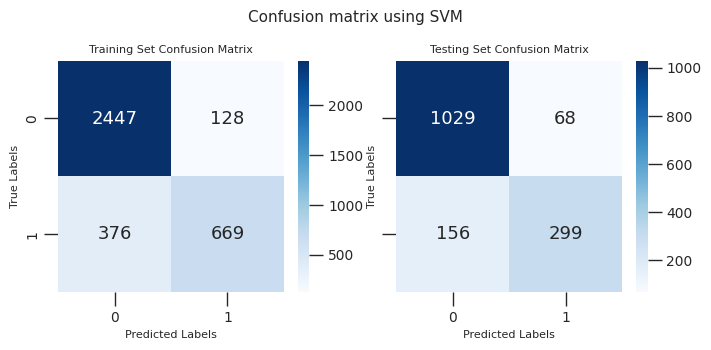

In [272]:
#SVM ####################################
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_train, y_train)
results.append(cv_results)

In [273]:
# Compute False postive rate, and True positive rate
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, svm.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc2 = metrics.roc_auc_score(y_train,svm.predict(x_train))

Accuracy: 0.888	0.889
Precision: 0.815	0.811
Recall: 0.794	0.809
F1 Score: 0.804	0.810


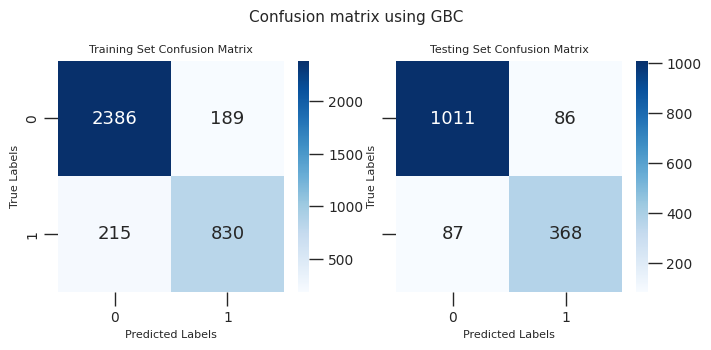

In [274]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)
calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_train, y_train)
results.append(cv_results)


In [275]:
# Compute False postive rate, and True positive rate
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, GBC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc3 = metrics.roc_auc_score(y_train,GBC.predict(x_train))

Accuracy: 0.823	0.827
Precision: 0.624	0.630
Recall: 0.975	0.989
F1 Score: 0.761	0.770


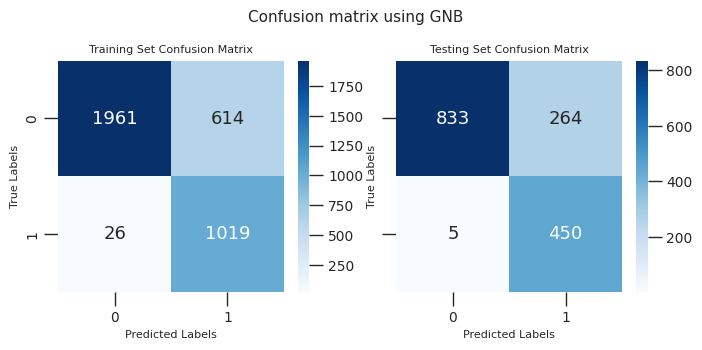

In [276]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred_train = GNB.predict(x_train)
y_pred_test  = GNB.predict(x_test)
calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_train, y_train)
results.append(cv_results)


In [277]:
# Compute False postive rate, and True positive rate
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_train, GNB.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc4 = metrics.roc_auc_score(y_train,GNB.predict(x_train))

Accuracy: 0.861	0.816
Precision: 0.721	0.660
Recall: 0.847	0.767
F1 Score: 0.779	0.709


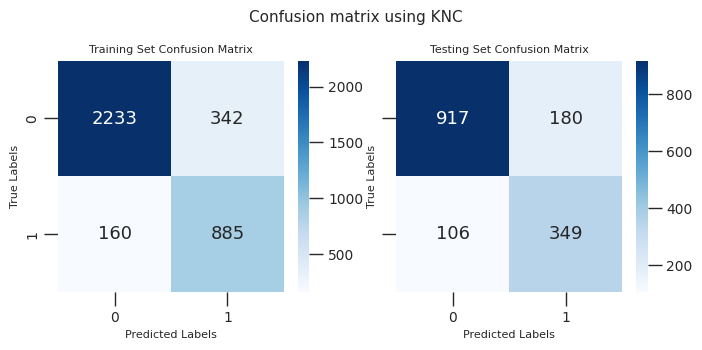

In [278]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_train, y_train)
results.append(cv_results)

In [279]:
# Compute False postive rate, and True positive rate
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, KNC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc5 = metrics.roc_auc_score(y_train,KNC.predict(x_train))

Accuracy: 0.794	0.795
Precision: 0.589	0.592
Recall: 0.956	0.965
F1 Score: 0.729	0.734


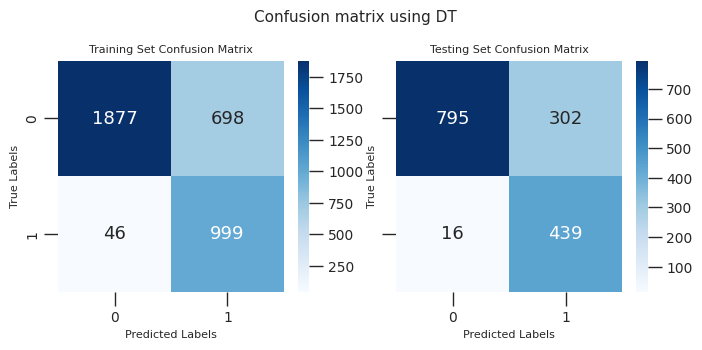

In [280]:
# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_train, y_train)
results.append(cv_results)


In [281]:
# Compute False postive rate, and True positive rate
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, DT.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc6 = metrics.roc_auc_score(y_train,DT.predict(x_train))

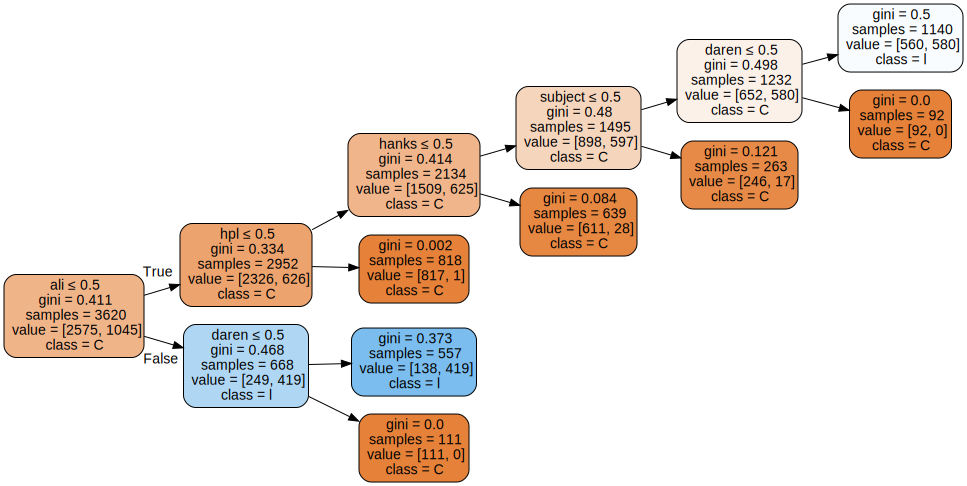

In [295]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Export the tree as a Graphviz dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=selected_feature_names,
                           class_names='Class', filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Save the graph as a PNG file
graph.format = 'png'
graph.render('Decision_Tree')

# Display the graph
graph

Accuracy: 0.931	0.878
Precision: 0.940	0.829
Recall: 0.811	0.736
F1 Score: 0.871	0.780


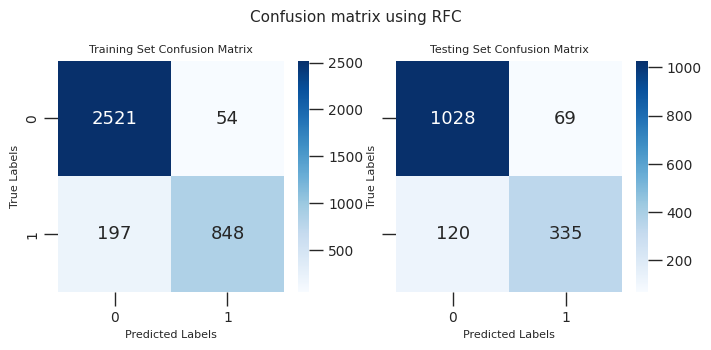

In [283]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# RFC = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=np.sqrt(X_train.shape[1]), random_state=42)
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_train, y_train)
results.append(cv_results)



In [284]:
# Compute False postive rate, and True positive rate
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_train, RFC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc7 = metrics.roc_auc_score(y_train,RFC.predict(x_train))

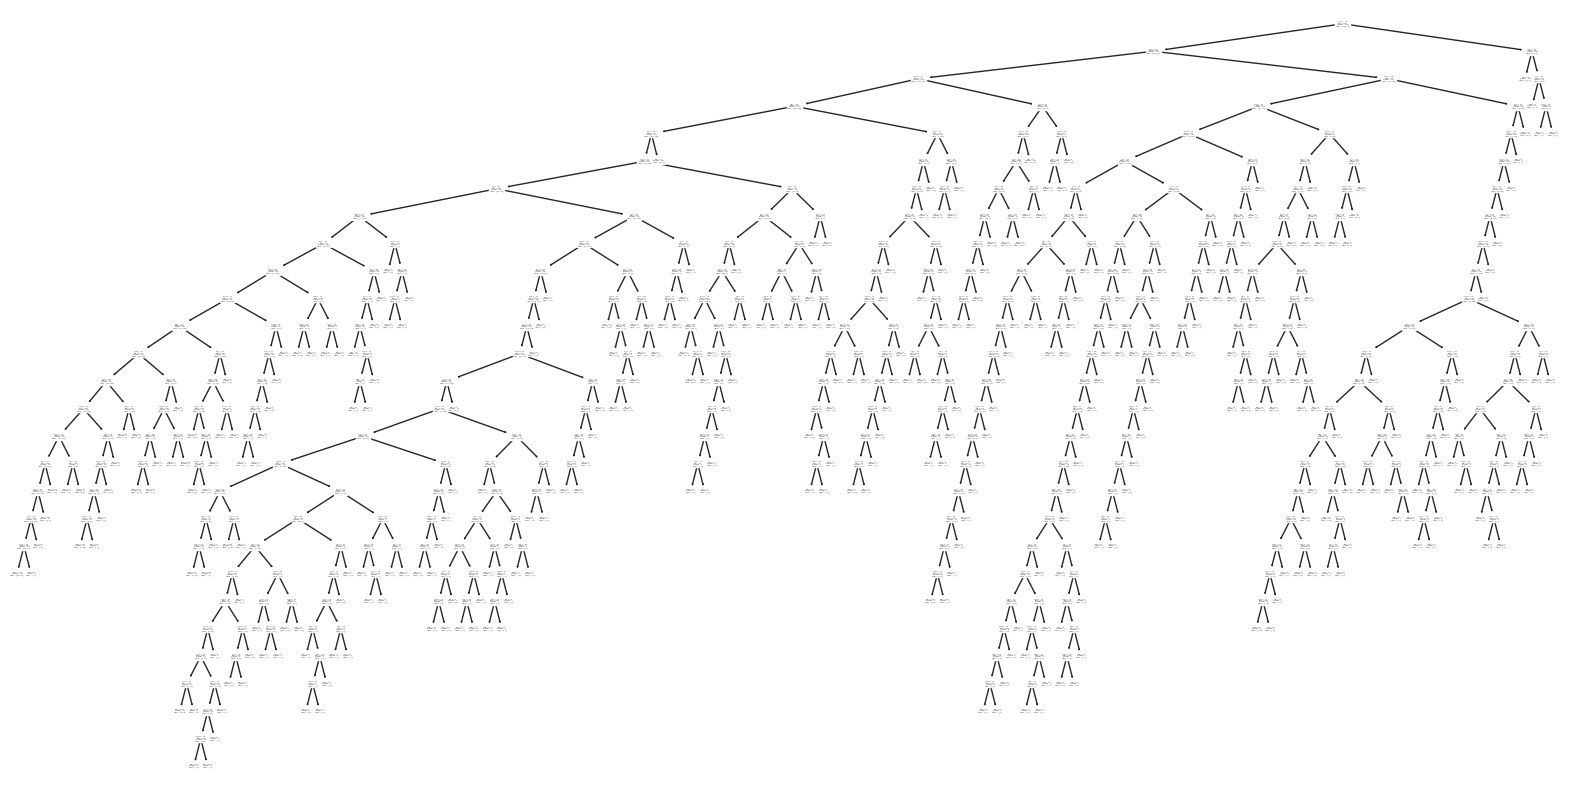

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose the best tree from the forest based on mean decrease impurity
best_tree_index = RFC.feature_importances_.argmax()

# Plot the best tree in the forest
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(RFC.estimators_[best_tree_index], ax=ax)
plt.show()

Accuracy: 0.877	0.886
Precision: 0.802	0.813
Recall: 0.762	0.793
F1 Score: 0.781	0.803


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


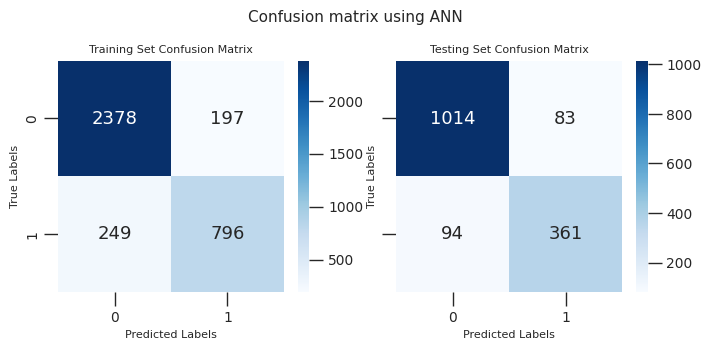

In [286]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', max_iter= 500, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_train, y_train)
results.append(cv_results)


In [287]:
# Compute False postive rate, and True positive rate
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, ANN.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc8 = metrics.roc_auc_score(y_train,ANN.predict(x_train))

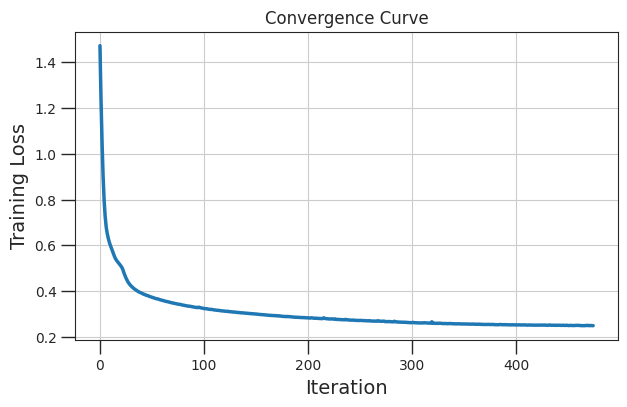

In [288]:
# Get the training loss values at each iteration
loss_values = ANN.loss_curve_

# Plot the convergence curve
plt.plot(loss_values)
plt.grid(True)
plt.title('Convergence Curve')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Training Loss', fontsize=14)
plt.savefig('ANN_convergence.png')
plt.show()

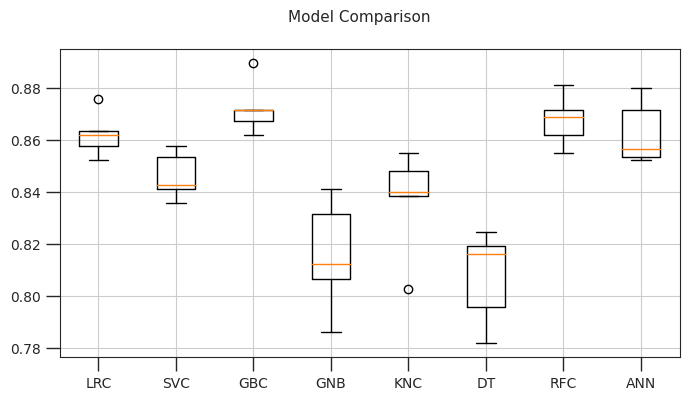

In [289]:
# Boxplot of the mean results of each supervised model for comparison 
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']
fig = plt.figure(figsize=(8,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.savefig('BoxPlot_Curves.png')
plt.show()

In [290]:
# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt

# def plot_roc_curve(y_true, y_score, label=None):
#     fpr, tpr, thresholds = roc_curve(y_true, y_score)
#     plt.plot(fpr, tpr, label=label)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend()
#     plt.show()


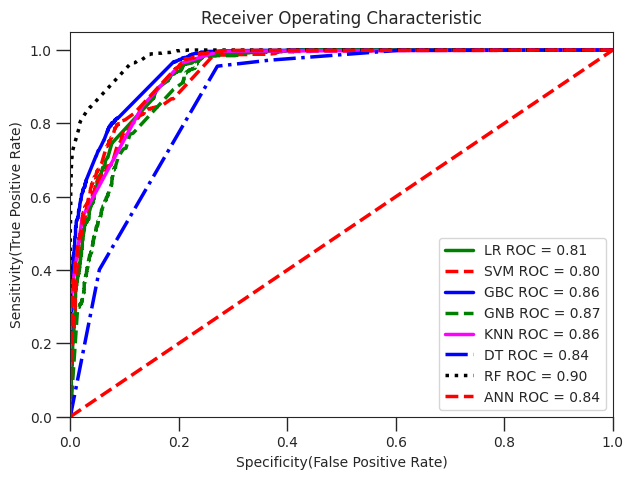

In [291]:
# Now, plot the computed values
fig = plt.figure(figsize=(7,5))

plt.plot(fpr1, tpr1, linestyle='-',color='green', label='LR ROC = %.2f' %auc1)
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='SVM ROC = %.2f' %auc2)
plt.plot(fpr3, tpr3, linestyle='-',color='blue', label='GBC ROC = %.2f' %auc3)
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='GNB ROC = %.2f' %auc4)
plt.plot(fpr5, tpr5, linestyle='-',color='magenta', label='KNN ROC = %.2f' %auc5)
plt.plot(fpr6, tpr6, linestyle='-.',color='blue', label='DT ROC = %.2f' %auc6)
plt.plot(fpr7, tpr7, linestyle=':',color='black', label='RF ROC = %.2f' %auc7)
plt.plot(fpr8, tpr8,linestyle='--',color='red', label='ANN ROC = %.2f' %auc8)

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display